# BMI INDEX IN IRELAND
## AUTHOR: ANTE DUJIC

## INTRODUCTION

This notebook contains a step by step simulated dataset of a relationship between BMI and Alcohol consumption in Ireland. The data is modeled and synthesised using *numpy.random* package in Python. 

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms and height in metres. [1]  It is widely used to diagnose whether individuals are underweight, overweight, or obese. [2] Alcohol consumption is often linked to a high weight. Drinking more than seven times per week was associated with increased risk of weight gain and development of overweight and obesity. [3] Average BMI is increased with an increased level of alcohol consumption in men and women. [4] The goal of this project is to create a dataset that will reflect the real life, with its destribution and relationships. The variables that will be generated are:
1. ID
2. Gender
3. Age
4. Height
5. Weight
6. BMI
7. Alcohol Consumption
8. BMI Classification


In [1]:
# Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
# Random number generator.
rng = np.random.default_rng(seed = 1)

df = pd.DataFrame(index=None)

### 1. ID

This variable will represent each person in the final dataset. There are 2 different approaches that were considered for this project:
- Creating a list of numerated persons
- Creating a list of person's names

Both are shown below.

In [3]:
# Creating a list of numerated persons.
person = []
for i in range (1, 11):
    person.append ("Person {}".format(i))
person

['Person 1',
 'Person 2',
 'Person 3',
 'Person 4',
 'Person 5',
 'Person 6',
 'Person 7',
 'Person 8',
 'Person 9',
 'Person 10']

In [4]:
# Creating a list of names. [1]
for i in range(10):
    print(names.get_full_name())

Stephanie Falcon
William Howell
Todd Holifeild
Sharon Wechsler
Ahmed Breeden
Eric Wakefield
Steven Marshall
Frederick Hampton
Juan Long
Earl Craun


### 2. GENDER

Gender is a categorical variable [5] and it can have two values: *male* and *female*. According to the latest World Bank data from 2020., percentage of female in Irish population is 50.4% [6] Male population is then 49.6%. I've used *random.choice* function to generate this data. For the sake of this project, I've decided to round these percentages.

In [5]:
# Generating gender with set probability.
gender_choice = ["Female", "Male"]
gender = rng.choice (gender_choice, p = [0.51, 0.49], size = 1000)
df["gender"] = gender
df["gender"].value_counts()

Female    515
Male      485
Name: gender, dtype: int64

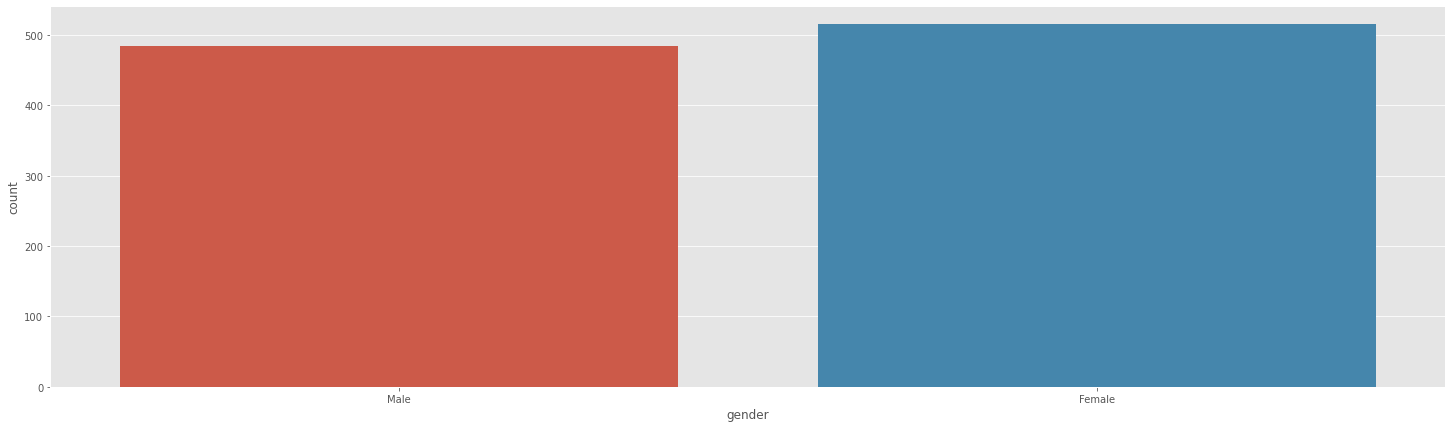

In [6]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.style.use('ggplot')

sns.countplot(x = df["gender"])
plt.show()

### 3. AGE

The age seem to follow normal distribution, if taken from the whole population, but a skewed one if taken of the sample of population. However, age cannot be a negative number which is allowed by Normal distribution. [] With this in mind, I've decided to use the Normal distribution but set the range to avoid the mentioned. The avarage age in Ireland in 2020. was 38.2. [7] The age range was set to be 18 to 100.

In [7]:
# Generating age using normal distribution (but clipping the data) [2]
age = []
for i in range(1000):
    a = np.clip(np.random.normal(38.2, 15), 18, 100)
    age.append(int(a))
df["age"] = age
# Current dataset
df.head()

,gender,age
0,Male,51
1,Male,37
2,Female,18
3,Male,28
4,Female,31


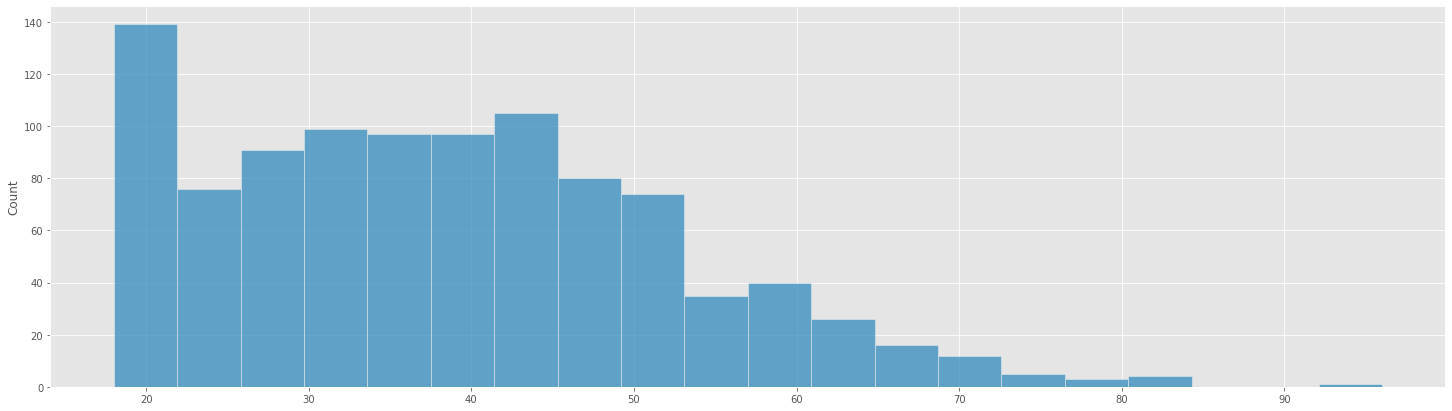

In [8]:
sns.histplot (age)
plt.show()

### 4. HEIGHT AND WEIGHT

Both height and weight are normally distributed. There is also a strong relationship between height and weight. As height increases, weight also tends to increase. [8] The avarage male height is 1.79m and weiht is 89.2kg. Avarage female height is 1.64m and avarage weight is 73.1kg. [9]  Both variables are generated at the same time, with set correlation between them. They are also generated separately for each gender.

In [80]:
# Defining a function.
def applyFunc(s):
    if s == "Male": # If male.
        # Create an array of height and weight.
        m_means = [179, 89.2] # mean for height and weight.
        m_stds = [15 / 3, 15 / 3] # standard deviation
        m_corr = 0.6 # correlation
        m_covs = [[m_stds[0]**2, m_stds[0]*m_stds[1]*m_corr], 
                [m_stds[0]*m_stds[1]*m_corr, m_stds[1]**2]]   
        m_data = rng.multivariate_normal(m_means, m_covs)       
        m_data = m_data.round(1)
        return m_data[0], m_data[1]
    if s == "Female": # If female.
         # Create an array of height and weight.
        f_means = [164, 73.1] # mean for height and weight.
        f_stds = [15 / 3, 15 / 3] # standard deviation
        f_corr = 0.6 # correlation
        f_covs = [[f_stds[0]**2, f_stds[0]*f_stds[1]*f_corr], 
                [f_stds[0]*f_stds[1]*f_corr, f_stds[1]**2]]   
        f_data = rng.multivariate_normal(f_means, f_covs)       
        f_data = f_data.round(1)
        return f_data[0], f_data[1]

# Create an array based on gender
height_weight = df["gender"].apply(applyFunc)
# Assign array elements [3]
df["height"]= height_weight.str[0]
df["weight"]= height_weight.str[1]
# Current dataset
df.head()

,gender,age,height,weight,bmi
0,Male,51,180.1,91.3,27.6
1,Male,37,177.2,85.7,27.9
2,Female,18,158.4,68.7,27.4
3,Male,28,178.5,80.8,27.6
4,Female,31,156.9,67.5,27.9


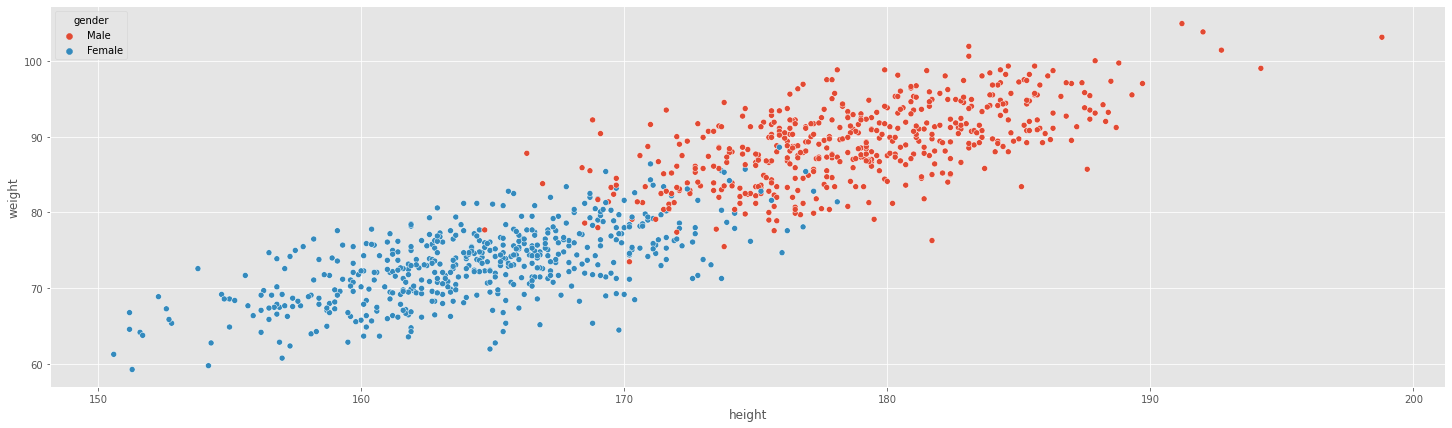

In [81]:
sns.scatterplot (x = df["height"], y = df["weight"], hue = df["gender"])
plt.show()

NEED MORE SPREAD DATA! FEMALE VS MALE LINEARY SEPARABLE

### BMI

In [11]:
df["bmi"] = (df["weight"] / ((df["height"])/100)**2).round(1)
df.head()

,gender,age,height,weight,bmi
0,Male,51,180.1,89.4,27.6
1,Male,37,178.1,88.5,27.9
2,Female,18,162.6,72.5,27.4
3,Male,28,179.6,89.0,27.6
4,Female,31,163.9,75.0,27.9


In [53]:
xx = np.array([-0.51, 51.2])
xx.std()

25.855

In [58]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000)

In [59]:
data = pd.DataFrame (m)
data

,0,1
0,38.635016,43.557239
1,33.682101,31.640155
2,30.419003,30.035028
3,20.868731,20.395447
4,31.691777,31.848907
...,...,...
995,21.800125,16.445793
996,15.270066,10.985809
997,37.960899,47.387457
998,24.089824,28.010251


In [65]:
data.corr()

,0,1
0,1.000000,0.811765
1,0.811765,1.000000


## REFERENCES

### MAIN

- [1] https://en.wikipedia.org/wiki/Body_mass_index
- [2] https://www.hindawi.com/journals/tswj/2012/849018/
- [3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4338356/
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6484200/
- [5] https://builtin.com/data-science/data-types-statistics
- [6] https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS?locations=IE
- [7] https://www.worldometers.info/world-population/ireland-population/
- [8] https://statisticsbyjim.com/basics/correlations/
- [9] https://www.worlddata.info/average-bodyheight.php

### CODE

- [1] https://moonbooks.org/Articles/How-to-generate-random-names-first-and-last-names-with-python-/
- [2] https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal
- [3] https://stackoverflow.com/questions/29550414/how-can-i-split-a-column-of-tuples-in-a-pandas-dataframe
- [4]
- [5] https://stackoverflow.com/questions/18683821/generating-random-correlated-x-and-y-points-using-numpy


OTHER


AGE
- https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib
- http://www.talkstats.com/threads/can-age-be-treated-as-normally-distributed.11875/